# NumPy

## Understanding Data Types in Python


```C
/* C code */
int result = 0;
for(int i=0; i<100; i++){
    result += i;
}
```

While in Python the equivalent operation could be written this way:
```python
# Python code
result = 0
for i in range(100):
    result += i
```


In [2]:
x=4
x='štiri'
print(x)

štiri


```C
/* C code */
int x = 4;
x = "four";  // FAILS
```

### A Python Integer Is More Than Just an Integer

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

A single integer in Python 3.4 actually contains four pieces:
- ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation
- ob_type, which encodes the type of the variable
- ob_size, which specifies the size of the following data members
- ob_digit, which contains the actual integer value that we expect the Python variable to represent.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png" alt="Integer Memory Layout">

### A Python List Is More Than Just a List


In [4]:
L=list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
type(L)

list

In [7]:
L2=[str(c) for c in range(10)]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
L3=[0,'a',True]
L3

[0, 'a', True]

In [13]:
import numpy as np
L4=np.array(range(10))
L4

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" alt="Array Memory Layout">

### Fixed-Type Arrays in Python


In [22]:
import array

a=array.array('i',L)
a

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## How Vectorization Makes Code Faster



<p><img alt="Translating Python code to bytecode" src="https://s3.amazonaws.com/dq-content/289/bytecode.svg"></p>


<table>
<thead>
<tr>
<th>Language Type</th>
<th>Example</th>
<th>Time taken to write program</th>
<th>Control over program performance</th>
</tr>
</thead>
<tbody>
<tr>
<td>High-Level</td>
<td>Python</td>
<td>Low</td>
<td>Low</td>
</tr>
<tr>
<td>Low-Level</td>
<td>C</td>
<td>High</td>
<td>High</td>
</tr>
</tbody>
</table>



<p><img alt="For loop to sum rows" src="https://s3.amazonaws.com/dq-content/289/for_loop.svg"></p>

In [21]:
myNum=[[6,5],[1,3],[5,6]]

sums=[]

for row in myNum:
    rSum=row[0]+row[1]
    sums.append(rSum)
print(sums)

[11, 4, 11]



<p><img alt="Unvectorized operation" src="https://s3.amazonaws.com/dq-content/289/unvectorized.svg"></p>

AttributeError: 'list' object has no attribute 'sum'

<p><img alt="Vectorized operation" src="https://s3.amazonaws.com/dq-content/289/vectorized.svg"></p>



## Numpy

In [24]:
import numpy as np

In [28]:
list1=[1,4,2,23,11.5,15151,12]
arr1=np.array(list1)
arr1

array([1.0000e+00, 4.0000e+00, 2.0000e+00, 2.3000e+01, 1.1500e+01,
       1.5151e+04, 1.2000e+01])

In [33]:
list2=[[1,4,2],[11,15151,12]]
arr2=np.array(list2)
arr2

array([[    1,     4,     2],
       [   11, 15151,    12]])

In [34]:
print(arr2)

[[    1     4     2]
 [   11 15151    12]]


In [37]:
tst=np.arange(0,20,2)
tst

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [41]:
tst2=np.linspace(0,18,10)
tst2

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [42]:
np.random.randint(0,100,(4,4))

array([[55, 83,  1, 52],
       [70, 74, 28, 79],
       [66, 98, 79, 93],
       [52, 37, 87, 32]])

### NumPy ndarrays



<p><img alt="Dimensional Arrays" src="https://s3.amazonaws.com/dq-content/289/dimensional_arrays.svg"></p>



#### Create an array



In [45]:
np.random.random((3,3))

array([[0.15333357, 0.0686634 , 0.30541275],
       [0.94854249, 0.29024744, 0.46064213],
       [0.00376823, 0.85217357, 0.00548309]])

#### Understanding NumPy ndarrays

In [46]:
data3=np.random.randint(0,10,(4,7))
data3

array([[1, 5, 3, 3, 1, 1, 0],
       [2, 3, 3, 8, 2, 5, 3],
       [9, 7, 8, 1, 7, 3, 1],
       [7, 2, 0, 7, 6, 9, 1]])

In [48]:
data3.ndim

2

In [49]:
data3.shape

(4, 7)

In [50]:
data3.size

28

In [52]:
data3.itemsize

8

In [54]:
data3.sum()

108

In [55]:
data3.nbytes

224

#### Selecting and Slicing Rows and Items from ndarrays

<p><img alt="Selecting rows from a 2D ndarray" src="https://s3.amazonaws.com/dq-content/289/selection_rows.svg"></p>



This is how we select a single item from a 2D ndarray:

<p><img alt="Selecting a single item from a 2D ndarray" src="https://s3.amazonaws.com/dq-content/289/selection_item.svg"></p>


In [57]:
data3=np.random.randint(10,size=(5,5))
data3

array([[6, 9, 1, 4, 9],
       [9, 1, 7, 0, 8],
       [3, 3, 3, 0, 2],
       [9, 7, 7, 2, 7],
       [6, 8, 7, 7, 3]])

In [59]:
frst_rw=data3[0]
frst_rw

array([6, 9, 1, 4, 9])

In [61]:
part=data3[3:,2:4]
part

array([[7, 2],
       [7, 7]])

#### Selecting Columns and Custom Slicing ndarrays

Let's continue by learning how to select one or more columns of data:

<p><img alt="Selecting columns from a 2D ndarray" src="https://s3.amazonaws.com/dq-content/289/selection_columns.svg"></p>



If we wanted to select a partial 1D slice of a row or column, we can combine a single value for one dimension with a slice for the other dimension:

<p><img alt="Selecting partial 1D slices from a 2D ndarray" src="https://s3.amazonaws.com/dq-content/289/selection_1darray.svg"></p>

Lastly, if we wanted to select a 2D slice, we can use slices for both dimensions:

<p><img alt="Selecting a 2D slice from a 2D ndarray" src="https://s3.amazonaws.com/dq-content/289/selection_2darray.svg"></p>



In [62]:
data4=np.random.randint(0,10,(4,7))
data4

array([[8, 3, 1, 1, 0, 8, 9],
       [6, 2, 9, 4, 9, 9, 4],
       [2, 2, 3, 6, 6, 3, 9],
       [3, 4, 2, 0, 0, 2, 7]])

In [64]:
dat=data4[:,2:-1]
dat

array([[1, 1, 0, 8],
       [9, 4, 9, 9],
       [3, 6, 6, 3],
       [2, 0, 0, 2]])

#### Modify values in ndarray



In [65]:
data4

array([[8, 3, 1, 1, 0, 8, 9],
       [6, 2, 9, 4, 9, 9, 4],
       [2, 2, 3, 6, 6, 3, 9],
       [3, 4, 2, 0, 0, 2, 7]])

In [67]:
data5=data4
data5[1,3]=999
data5

array([[  8,   3,   1,   1,   0,   8,   9],
       [  6,   2,   9, 999,   9,   9,   4],
       [  2,   2,   3,   6,   6,   3,   9],
       [  3,   4,   2,   0,   0,   2,   7]])

#### Datatypes

[Več o datatypes](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)

[List of scalars](https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html#arrays-scalars-built-in)

In [70]:
data6=data5.astype('complex128')
data6

array([[  8.+0.j,   3.+0.j,   1.+0.j,   1.+0.j,   0.+0.j,   8.+0.j,
          9.+0.j],
       [  6.+0.j,   2.+0.j,   9.+0.j, 999.+0.j,   9.+0.j,   9.+0.j,
          4.+0.j],
       [  2.+0.j,   2.+0.j,   3.+0.j,   6.+0.j,   6.+0.j,   3.+0.j,
          9.+0.j],
       [  3.+0.j,   4.+0.j,   2.+0.j,   0.+0.j,   0.+0.j,   2.+0.j,
          7.+0.j]])

In [71]:
data6.dtype

dtype('complex128')

In [72]:
print(data6.dtype)

complex128


<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Data type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>bool_</code></td>
<td>Boolean (True or False) stored as a byte</td>
</tr>
<tr>
<td><code>int_</code></td>
<td>Default integer type (same as C <code>long</code>; normally either <code>int64</code> or <code>int32</code>)</td>
</tr>
<tr>
<td><code>intc</code></td>
<td>Identical to C <code>int</code> (normally <code>int32</code> or <code>int64</code>)</td>
</tr>
<tr>
<td><code>intp</code></td>
<td>Integer used for indexing (same as C <code>ssize_t</code>; normally either <code>int32</code> or <code>int64</code>)</td>
</tr>
<tr>
<td><code>int8</code></td>
<td>Byte (-128 to 127)</td>
</tr>
<tr>
<td><code>int16</code></td>
<td>Integer (-32768 to 32767)</td>
</tr>
<tr>
<td><code>int32</code></td>
<td>Integer (-2147483648 to 2147483647)</td>
</tr>
<tr>
<td><code>int64</code></td>
<td>Integer (-9223372036854775808 to 9223372036854775807)</td>
</tr>
<tr>
<td><code>uint8</code></td>
<td>Unsigned integer (0 to 255)</td>
</tr>
<tr>
<td><code>uint16</code></td>
<td>Unsigned integer (0 to 65535)</td>
</tr>
<tr>
<td><code>uint32</code></td>
<td>Unsigned integer (0 to 4294967295)</td>
</tr>
<tr>
<td><code>uint64</code></td>
<td>Unsigned integer (0 to 18446744073709551615)</td>
</tr>
<tr>
<td><code>float_</code></td>
<td>Shorthand for <code>float64</code>.</td>
</tr>
<tr>
<td><code>float16</code></td>
<td>Half precision float: sign bit, 5 bits exponent, 10 bits mantissa</td>
</tr>
<tr>
<td><code>float32</code></td>
<td>Single precision float: sign bit, 8 bits exponent, 23 bits mantissa</td>
</tr>
<tr>
<td><code>float64</code></td>
<td>Double precision float: sign bit, 11 bits exponent, 52 bits mantissa</td>
</tr>
<tr>
<td><code>complex_</code></td>
<td>Shorthand for <code>complex128</code>.</td>
</tr>
<tr>
<td><code>complex64</code></td>
<td>Complex number, represented by two 32-bit floats</td>
</tr>
<tr>
<td><code>complex128</code></td>
<td>Complex number, represented by two 64-bit floats</td>
</tr>
</tbody>
</table>

</div>

### Computation on NumPy Arrays: Universal Functions


#### The Slowness of Loops



In [1]:
import numpy as np

In [20]:
def compute_reciprocals(values):
    output=np.empty(len(values))
    for i in range(len(values)):
        output[i]=1/values[i]
    return output

In [12]:
np.random.seed(0)

values=np.random.randint(1,10,size=5)
values

array([6, 1, 4, 4, 8])

In [21]:
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [22]:
big_array=np.random.randint(1,100,size=1000000)

In [23]:
%timeit compute_reciprocals(big_array)

1.02 s ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit 1/big_array

1.54 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Introducing UFuncs (Universal functions)

[Docs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html())



In [24]:
L1=[1,2,3]
L2=[4,5,6]


In [26]:
L1+L2

[1, 2, 3, 4, 5, 6]

In [30]:
l1=np.array(L1)
l2=np.array(L2)

In [31]:
l1+l2

array([5, 7, 9])

### Uvoz realnih podatkov


In [35]:
import csv

In [38]:
a=csv('c.csv')

TypeError: 'module' object is not callable

In [42]:
with open('taxi_data.csv', mode='r') as csv_file:
    taxi_list=list(csv.reader(csv_file))

In [43]:
taxi_list

[['VendorID',
  'lpep_pickup_datetime',
  'lpep_dropoff_datetime',
  'store_and_fwd_flag',
  'RatecodeID',
  'PULocationID',
  'DOLocationID',
  'passenger_count',
  'trip_distance',
  'fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'ehail_fee',
  'improvement_surcharge',
  'total_amount',
  'payment_type',
  'trip_type'],
 [],
 ['2',
  '2017-01-01 00:01:15',
  '2017-01-01 00:11:05',
  'N',
  '1',
  '42',
  '166',
  '1',
  '1.71',
  '9',
  '0',
  '0.5',
  '0',
  '0',
  '',
  '0.3',
  '9.8',
  '2',
  '1'],
 ['2',
  '2017-01-01 00:03:34',
  '2017-01-01 00:09:00',
  'N',
  '1',
  '75',
  '74',
  '1',
  '1.44',
  '6.5',
  '0.5',
  '0.5',
  '0',
  '0',
  '',
  '0.3',
  '7.8',
  '2',
  '1'],
 ['2',
  '2017-01-01 00:04:02',
  '2017-01-01 00:12:55',
  'N',
  '1',
  '82',
  '70',
  '5',
  '3.45',
  '12',
  '0.5',
  '0.5',
  '2.66',
  '0',
  '',
  '0.3',
  '15.96',
  '1',
  '1'],
 ['2',
  '2017-01-01 00:01:40',
  '2017-01-01 00:14:23',
  'N',
  '1',
  '255',
  '232',
 

In [44]:
taxi_list=taxi_list[2:]

In [47]:
conv_taxi_list=[]

for row in taxi_list:
    conveted_row=[]
    for it in row:
        try:
            conveted_row.append(float(it))
        except:
            pass
    conv_taxi_list.append(conveted_row)

In [48]:
conv_taxi_list

[[2.0,
  1.0,
  42.0,
  166.0,
  1.0,
  1.71,
  9.0,
  0.0,
  0.5,
  0.0,
  0.0,
  0.3,
  9.8,
  2.0,
  1.0],
 [2.0,
  1.0,
  75.0,
  74.0,
  1.0,
  1.44,
  6.5,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  7.8,
  2.0,
  1.0],
 [2.0,
  1.0,
  82.0,
  70.0,
  5.0,
  3.45,
  12.0,
  0.5,
  0.5,
  2.66,
  0.0,
  0.3,
  15.96,
  1.0,
  1.0],
 [2.0,
  1.0,
  255.0,
  232.0,
  1.0,
  2.11,
  10.5,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  11.8,
  2.0,
  1.0],
 [2.0,
  1.0,
  166.0,
  239.0,
  1.0,
  2.76,
  11.5,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  12.8,
  2.0,
  1.0],
 [2.0,
  1.0,
  179.0,
  226.0,
  1.0,
  4.14,
  15.0,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  16.3,
  1.0,
  1.0],
 [2.0,
  1.0,
  74.0,
  167.0,
  1.0,
  4.22,
  19.0,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  20.3,
  2.0,
  1.0],
 [2.0,
  1.0,
  112.0,
  37.0,
  1.0,
  2.83,
  11.0,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  12.3,
  2.0,
  1.0],
 [2.0,
  1.0,
  36.0,
  37.0,
  1.0,
  0.78,
  5.0,
  0.5,
  0.5,
  0.0,
  0.0,
  0.3,
  6.3,
  2.0,
  1.

In [50]:
conv_taxi_array=np.array(conv_taxi_list)
conv_taxi_array

array([[  2.  ,   1.  ,  42.  , ...,   9.8 ,   2.  ,   1.  ],
       [  2.  ,   1.  ,  75.  , ...,   7.8 ,   2.  ,   1.  ],
       [  2.  ,   1.  ,  82.  , ...,  15.96,   1.  ,   1.  ],
       ...,
       [  1.  ,   1.  , 228.  , ...,  80.3 ,   1.  ,   1.  ],
       [  1.  ,   1.  ,   7.  , ...,  17.3 ,   1.  ,   1.  ],
       [  1.  ,   1.  , 255.  , ...,  12.8 ,   1.  ,   1.  ]])

- Row 1 is RatecodeID
- Row 2 is PULocationID
- Row 3 is DOLocationID
- Row 4 is passenger_count
- Row 5 is trip_distance
- Row 6 is fare_amount
- Row 7 is extra
- Row 8 is mta_tax
- Row 9 is tip_amount
- Row 10 is tolls_amount
- Row 11 is improvement_surcharge
- Row 12 is total_amount
- Row 13 is payment_type
- Row 14 is trip_type

### Vector Math



In [51]:
l1+l2

array([5, 7, 9])

In [52]:
l1//l2

array([0, 0, 0])

In [53]:
l1%l2

array([1, 2, 3])


Here's what happened behind the scenes:

<p><img alt="Vectorized Addition" src="https://s3.amazonaws.com/dq-content/289/vectorized_addition.svg"></p>


- `vector_a + vector_b` - Addition
- `vector_a - vector_b7` - Subtraction
- `vector_a * vector_b` - Multiplication (this is unrelated to the vector multiplication used in linear algebra).
- `vector_a / vector_b` - Division
- `vector_a % vector_b` - Modulus (find the remainder when vector_a is divided by vector_b)
- `vector_a ** vector_b` - Exponent (raise vector_a to the power of vector_b)
- `vector_a // vector_b` - Floor Division (divide vector_a by vector_b, rounding down to the nearest integer)

In [55]:
col1=conv_taxi_array[:,6]
col2=conv_taxi_array[:,8]
col3=conv_taxi_array[:,11]

In [56]:
col1

array([ 9. ,  6.5, 12. , ..., 61. , 14.5, 10. ])

In [57]:
col2

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [58]:
col3

array([0.3, 0.3, 0.3, ..., 0.3, 0.3, 0.3])


<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>The following table lists the arithmetic operators implemented in NumPy:</p>
<table>
<thead><tr>
<th>Operator</th>
<th>Equivalent ufunc</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>+</code></td>
<td><code>np.add</code></td>
<td>Addition (e.g., <code>1 + 1 = 2</code>)</td>
</tr>
<tr>
<td><code>-</code></td>
<td><code>np.subtract</code></td>
<td>Subtraction (e.g., <code>3 - 2 = 1</code>)</td>
</tr>
<tr>
<td><code>-</code></td>
<td><code>np.negative</code></td>
<td>Unary negation (e.g., <code>-2</code>)</td>
</tr>
<tr>
<td><code>*</code></td>
<td><code>np.multiply</code></td>
<td>Multiplication (e.g., <code>2 * 3 = 6</code>)</td>
</tr>
<tr>
<td><code>/</code></td>
<td><code>np.divide</code></td>
<td>Division (e.g., <code>3 / 2 = 1.5</code>)</td>
</tr>
<tr>
<td><code>//</code></td>
<td><code>np.floor_divide</code></td>
<td>Floor division (e.g., <code>3 // 2 = 1</code>)</td>
</tr>
<tr>
<td><code>**</code></td>
<td><code>np.power</code></td>
<td>Exponentiation (e.g., <code>2 ** 3 = 8</code>)</td>
</tr>
<tr>
<td><code>%</code></td>
<td><code>np.mod</code></td>
<td>Modulus/remainder (e.g., <code>9 % 4 = 1</code>)</td>
</tr>
</tbody>
</table>
<p>Additionally there are Boolean/bitwise operators; we will explore these in <a href="02.06-boolean-arrays-and-masks.html">Comparisons, Masks, and Boolean Logic</a>.</p>

</div>
</div>

[Mathematical expressions](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.math.html#arithmetic-operations)

### Calculating Statistics For 1D ndarrays



In [59]:
col1.mean()

13.216385638563859

In [60]:
len(col1)

19998

In [104]:
trip_distance=conv_taxi_array[:,5]
trip_price=conv_taxi_array[:,13]

In [105]:
trip_per_mile=trip_price/trip_distance

/home/analitikapodatkov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [63]:
trip_distance.mean()

29.849333333333334

In [64]:
trip_price.mean()

17.771333333333335

In [67]:
trip_per_mile[~np.isnan(trip_per_mile)].mean()

0.7974397550569455

(array([10.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   1.73,   3.46,   5.19,   6.92,   8.65,  10.38,  12.11,
         13.84,  15.57,  17.3 ,  19.03,  20.76,  22.49,  24.22,  25.95,
         27.68,  29.41,  31.14,  32.87,  34.6 ,  36.33,  38.06,  39.79,
         41.52,  43.25,  44.98,  46.71,  48.44,  50.17,  51.9 ,  53.63,
         55.36,  57.09,  58.82,  60.55,  62.28,  64.01,  65.74,  67.47,
         69.2 ,  70.93,  72.66,  74.39,  76.12,  77.85,  79.58,  81.31,
  

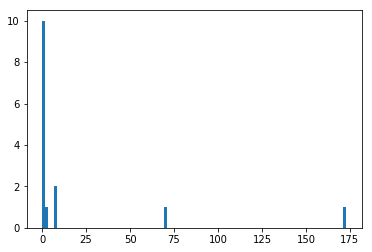

In [76]:
from matplotlib import pyplot as pp
pp.figure()
pp.hist(trip_price,bins=100)

### Calculating Statistics For 2D ndarrays

For now, we're going to look at how we can calculate statistics for two-dimensional ndarrays. If we use the arrays without additional parameters, they will return a single value, just like they do with a 1D array:

<p><img alt="Array method without axis parameter" src="https://s3.amazonaws.com/dq-content/289/array_method_axis_none.svg"></p>

But what if we wanted to find the maximum value of each row? For that, we need to use the axis parameter, and specify a value of 1, which indicates we want to calculate values for each row.

<p><img alt="Array method without axis 1" src="https://s3.amazonaws.com/dq-content/289/array_method_axis_1.svg"></p>

If we want to find the maximum value of each column, we use an axis value of 0:

<p><img alt="Array method without axis 1" src="https://s3.amazonaws.com/dq-content/289/array_method_axis_0.svg"></p>

To help you remember which is which, you can think of the first axis as rows, and the second axis as columns, just in the same way as when we're indexing a 2D NumPy array we use ndarray[row,column]. Then you think about which axis you want to apply the method along. The tricky part is to remember that when you apply the method along one axis, you get results in the other axis. Here is an illustration of that:

<p><img alt="The axis parameter" src="https://s3.amazonaws.com/dq-content/289/axis_param.svg"></p>



In [77]:
conv_taxi_array.min(axis=0)

array([  1. ,   1. ,   3. ,   1. ,   0. ,   0. , -60. ,  -0.5,  -0.5,
       -16. ,   0. ,  -0.3, -60. ,   1. ,   1. ])

In [78]:
conv_taxi_array_20=conv_taxi_array[:20]

In [80]:
cene=conv_taxi_array_20[:,6:12]

In [82]:
cene.sum(axis=1)

array([ 9.8 ,  7.8 , 15.96, 11.8 , 12.8 , 16.3 , 20.3 , 12.3 ,  6.3 ,
       14.8 , 11.76, 23.3 , 31.3 ,  8.3 , 25.74, 11.3 ,  3.  , 12.36,
       21.59, 11.8 ])

In [84]:
conv_taxi_array_20[:,12]

array([ 9.8 ,  7.8 , 15.96, 11.8 , 12.8 , 16.3 , 20.3 , 12.3 ,  6.3 ,
       14.8 , 11.76, 23.3 , 31.3 ,  8.3 , 25.74, 11.3 ,  3.  , 12.36,
       21.59, 11.8 ])

### Adding Rows and Columns to ndarrays


In [88]:
a1=np.ones([2,3])
a1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [94]:
a2=np.zeros(3) # ali da damo np.zeros([1,3]) ki naredi 2d array
a2

array([0., 0., 0.])

In [99]:
a3=np.concatenate([a1,np.expand_dims(a2,axis=0)],axis=0)
a3

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.]])

array([[0., 0., 0.]])

### Sorting ndarrays


In [106]:
trip_per_mile.shape

(19998,)

In [108]:
trip_per_mile2d=np.expand_dims(trip_per_mile,axis=1)

In [110]:
conv_taxi_array=np.concatenate([conv_taxi_array,trip_per_mile2d],axis=1)

In [111]:
sadje=np.array(['pomaranca','banana','jabolko','grozdje','cesnja'])

In [116]:
sadje[sadje.argsort()]

array(['banana', 'cesnja', 'grozdje', 'jabolko', 'pomaranca'], dtype='<U9')

In [123]:
int_square=np.random.randint(10,size=(5,5))
int_square

array([[0, 3, 1, 8, 6],
       [9, 9, 7, 6, 0],
       [9, 1, 1, 3, 9],
       [2, 6, 1, 1, 7],
       [8, 9, 5, 9, 6]])

In [131]:
int_square[int_square[:,-1].argsort(),:]

array([[9, 9, 7, 6, 0],
       [0, 3, 1, 8, 6],
       [8, 9, 5, 9, 6],
       [2, 6, 1, 1, 7],
       [9, 1, 1, 3, 9]])

###  Reading CSV files with NumPy

In [138]:
taxi=np.genfromtxt('taxi_data.csv', delimiter=',',skip_header=2)
taxi

array([[ 2.  ,   nan,   nan, ...,  9.8 ,  2.  ,  1.  ],
       [ 2.  ,   nan,   nan, ...,  7.8 ,  2.  ,  1.  ],
       [ 2.  ,   nan,   nan, ..., 15.96,  1.  ,  1.  ],
       ...,
       [ 1.  ,   nan,   nan, ..., 80.3 ,  1.  ,  1.  ],
       [ 1.  ,   nan,   nan, ..., 17.3 ,  1.  ,  1.  ],
       [ 1.  ,   nan,   nan, ..., 12.8 ,  1.  ,  1.  ]])

In [140]:
passangers=taxi[:,7]
passangers

array([1., 1., 5., ..., 2., 1., 1.])

In [141]:
taxi[passangers==2]

array([[ 2.  ,   nan,   nan, ..., 27.36,  1.  ,  1.  ],
       [ 2.  ,   nan,   nan, ..., 11.8 ,  2.  ,  1.  ],
       [ 2.  ,   nan,   nan, ..., 17.76,  1.  ,  1.  ],
       ...,
       [ 2.  ,   nan,   nan, ...,  5.8 ,  2.  ,  1.  ],
       [ 1.  ,   nan,   nan, ..., 20.8 ,  2.  ,  1.  ],
       [ 1.  ,   nan,   nan, ..., 80.3 ,  1.  ,  1.  ]])

###  Boolean Arrays





A similar pattern occurs– the 'less than five' operation is applied to each value in the array. The diagram below shows this step by step:

<p><img alt="Vectorized boolean operation" src="https://s3.amazonaws.com/dq-content/290/vectorized_bool.svg"></p>

### Boolean Indexing with 1D ndarrays




<p><img alt="Boolean indexing 1D ndarrays 1" src="https://s3.amazonaws.com/dq-content/290/1d_bool_1.svg"></p>



<p><img alt="Boolean indexing 1D ndarrays 2" src="https://s3.amazonaws.com/dq-content/290/1d_bool_2.svg"></p>




### Boolean Indexing with 2D ndarrays


<p><img alt="Boolean indexing 1D ndarrays 2" src="https://s3.amazonaws.com/dq-content/290/bool_dims.svg"></p>


### Assigning Values in ndarrays

In [142]:
int_square=np.random.randint(10,size=(5,5))
int_square

array([[5, 3, 6, 8, 0],
       [7, 0, 6, 5, 5],
       [8, 9, 3, 5, 7],
       [3, 4, 8, 3, 5],
       [7, 0, 5, 8, 3]])

In [143]:
int_square[2:,:]=-1
int_square

array([[ 5,  3,  6,  8,  0],
       [ 7,  0,  6,  5,  5],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1]])

### Subarrays as no-copy views



In [144]:
a=int_square.copy()

### Copying Data
